In [4]:
import pandas as pd

df=pd.read_csv(r"C:\Users\kumar\Downloads\test_Ritvik Kumar_Rujhan N Sharma.csv")


In [5]:
# +++++++++++++ Average Delay and Percentage of Late Departures ++++++++++++++

# flights that are actually delayed (delay > 0)
late_flights = df[df['departure_delay_minutes'] > 0]

# Calculate the average delay for these late flights
avg_late_delay = late_flights['departure_delay_minutes'].mean()

# Calculate the percentage of flights that are late
late_flight_percentage = (len(late_flights) / len(df)) * 100

print(f"Average delay for late flights: {avg_late_delay:.2f} minutes")
print(f"Percentage of flights that depart later than scheduled: {late_flight_percentage:.2f}%")

Average delay for late flights: 47.06 minutes
Percentage of flights that depart later than scheduled: 49.61%


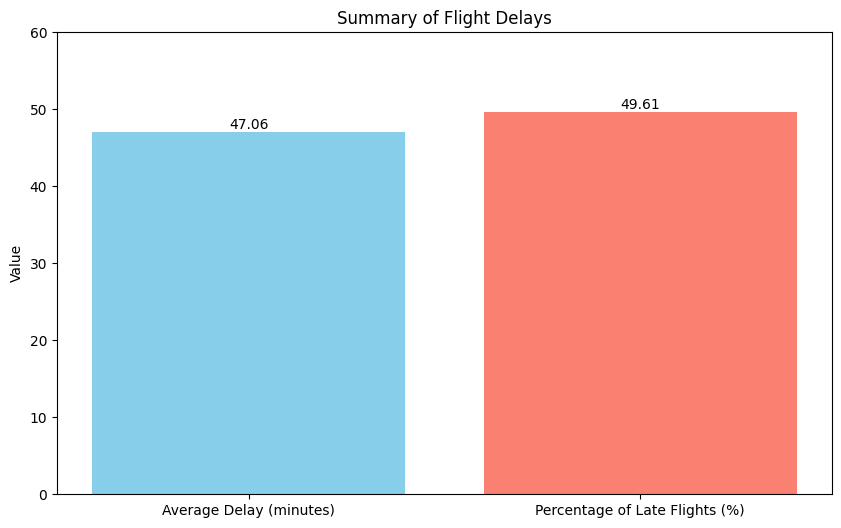

In [6]:
# ++++++++ Visualization ++++++++ 

import matplotlib.pyplot as plt
import numpy as np

avg_late_delay = 47.06
late_flight_percentage = 49.61

data_for_plot = pd.DataFrame({
    'Metric': ['Average Delay (minutes)', 'Percentage of Late Flights (%)'],
    'Value': [avg_late_delay, late_flight_percentage]
})

plt.figure(figsize=(10, 6))
bars = plt.bar(data_for_plot['Metric'], data_for_plot['Value'], color=['skyblue', 'salmon'])
plt.title('Summary of Flight Delays')
plt.ylabel('Value')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}',
             ha='center', va='bottom')

plt.ylim(0, 60) # Set a y-limit for better visual comparison
plt.show()

1) Nearly half of all flights in the dataset experienced a delay.

2) For those that were late, the average delay was substantial, at just over 47 minutes.

These high-level metrics provide a strong starting point for further investigation into the specific factors contributing to these delays.


In [7]:
# ++++++++++++  Scheduled Ground Time vs. Minimum Turn Time +++++++++++++

# We have to determine if flights have suffered delay

# Flights where scheduled ground time is less than or equal to minimum turn time
insufficient_ground_time_flights = df[df['scheduled_ground_time_minutes'] <= df['minimum_turn_minutes']]

# Count the number of such flights
count_insufficient_ground_time = len(insufficient_ground_time_flights)

print(f"Number of flights with scheduled ground time <= minimum turn time: {count_insufficient_ground_time}")

Number of flights with scheduled ground time <= minimum turn time: 652


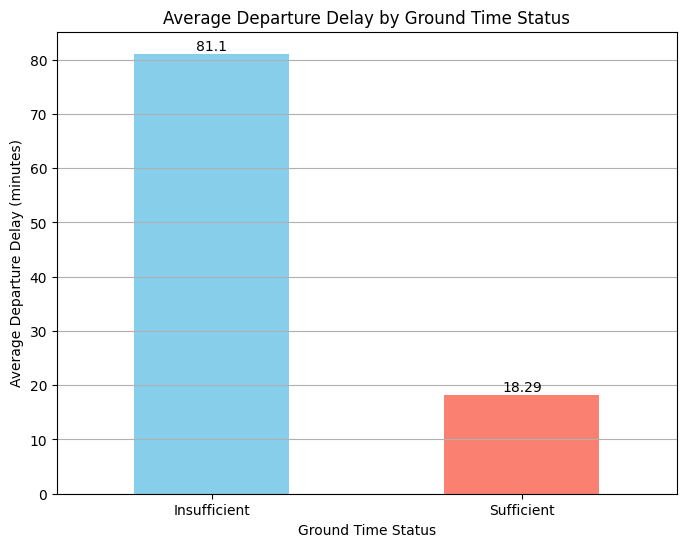

In [8]:
# +++++++++  Visualization ++++++++++

import matplotlib.pyplot as plt
import numpy as np

# Creating a category to distinguish flights with sufficient/insufficient ground time
# (Assuming df is your DataFrame)
df['ground_time_status'] = np.where(df['scheduled_ground_time_minutes'] <= df['minimum_turn_minutes'],
                                     'Insufficient',
                                     'Sufficient')

# Calculate the average departure delay for each group
avg_delay_by_status = df.groupby('ground_time_status')['departure_delay_minutes'].mean()

plt.figure(figsize=(8, 6))
bars = avg_delay_by_status.plot(kind='bar', color=['skyblue', 'salmon'])

# Loop through each bar and add the value as text
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Average Departure Delay by Ground Time Status')
plt.xlabel('Ground Time Status')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

A count of 652 flights indicates that a considerable portion of the schedule is operating on a tight margin.
we can conclude that a substantial number of flights are scheduled with inadequate turnarounds. This could be a major contributor to overall flight difficulty and delays.

The Bar chart shows a contrast between two categories:

    1). The average delay for flights with insufficient ground time is approximately 80 minutes.

    2). The average delay for flights with sufficient ground time is around 18 minutes.






In [9]:
# +++++++++++++ Ratio of Transfer Bags vs. Checked Bags ++++++++++++++++

# Calculating the total checked and transfer bags
total_checked_bags= df['TOTAL_BAGS'].sum()
total_transfer_bags= df['TRANSFER_BAGGAGE'].sum()
total_hot_bags= df['HOT_TRANSFER_BAGGAGE'].sum()

# Finding the ratio
if total_checked_bags>0:
    transfer_bag_ratio = (total_transfer_bags/total_checked_bags )*100
    hot_bag_ratio = (total_hot_bags/total_checked_bags )*100


    print(f"Ratio of transfer bags to total checked bags:{transfer_bag_ratio:.2f}%")
    print(f"Ratio of hot bags to total checked bags:{hot_bag_ratio:.2f}%")
else:
    print("No checked bags found in the dataset.")




Ratio of transfer bags to total checked bags:48.47%
Ratio of hot bags to total checked bags:7.39%


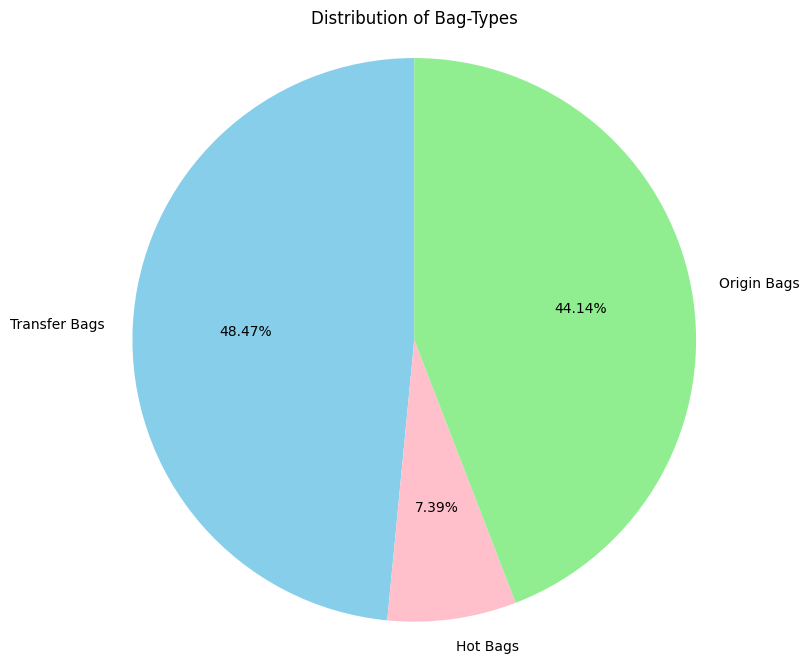

In [10]:
# ++++++++ Visualization ++++++++++

transfer_bag_ratio = 48.47
hot_bag_ratio= 7.39

origin_bag_ratio = 100 - transfer_bag_ratio - hot_bag_ratio

# Data for the pie chart
labels = ['Transfer Bags', 'Hot Bags', 'Origin Bags']
sizes = [transfer_bag_ratio, hot_bag_ratio,  origin_bag_ratio]
colors = ['skyblue', 'pink', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Bag-Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('baggage_ratio_pie_chart.png')
plt.show()

The Pie Chart shows that: 

1) 48.47% of total bags are Transfer Bags
2) 44.14% of total bags are Origin Bags
3) 7.39% of total bags are Hot Bags

This shows that majority of the bags are transfer Bags.

In [11]:
# ++++++++++++++  Passenger Loads and Operational Difficulty +++++++++++++

# We need to find relation between number of passengers and flight delays

correlation= df['TOTAL_PASSENGERS'].corr(df['departure_delay_minutes'])

print(f"Correlation between Total Passengers and Departure Delay: {correlation:.2f}")

Correlation between Total Passengers and Departure Delay: -0.03


Based on the low correlation of -0.03, 

We can conclude that there is a very weak, almost non-existent relationship between the total number of passengers and the length of a flight's departure delay.

In [12]:
# ++++++++++++++++ Special Service Requests and High-Delay Flights +++++++++++++

# We Need to check if flights with special servie requests are more prone to delays

# creating new columns for flights with SSRs
df['has_ssr']= (
    (df['PEOPLE_OPTED_FOR_AIRPORT_WHEELCHAIR'] > 0) |
    (df['PEOPLE_OPTED_FOR_UNACCOMPANIED_MINOR'] > 0) |
    (df['PEOPLE_OPTED_FOR_MANUAL_WHEELCHAIR'] > 0) |
    (df['PEOPLE_OPTED_FOR_ELECTRIC_WHEELCHAIR'] > 0)
)

# Calculating average delay for flights with and without SSRs
avg_delay_with_ssr = df[df['has_ssr']]['departure_delay_minutes'].mean()
avg_delay_without_ssr = df[~df['has_ssr']]['departure_delay_minutes'].mean()

print(f"Average departure delay for flights with SSRs: {avg_delay_with_ssr:.2f} minutes")
print(f"Average departure delay for flights without SSRs: {avg_delay_without_ssr:.2f} minutes")


Average departure delay for flights with SSRs: 23.75 minutes
Average departure delay for flights without SSRs: 21.98 minutes


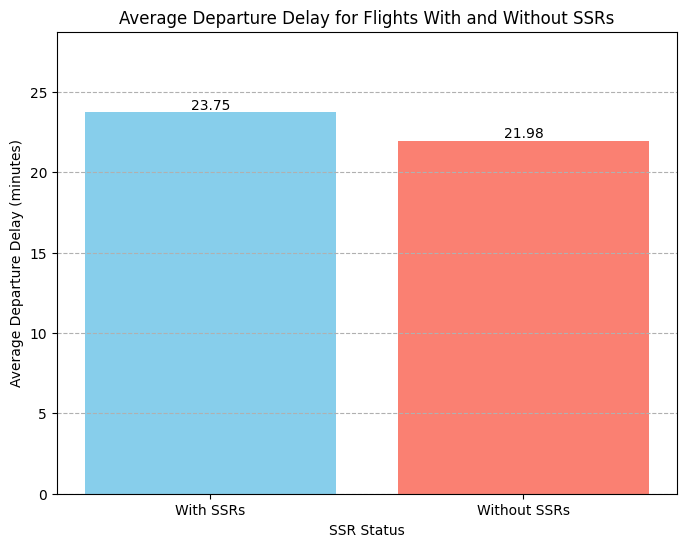

In [13]:
# ++++++++++++++++++ visualization +++++++++++++

avg_delay_with_ssr = 23.75
avg_delay_without_ssr = 21.98

data = {
    'SSR Status': ['With SSRs', 'Without SSRs'],
    'Average Delay (minutes)': [avg_delay_with_ssr, avg_delay_without_ssr]
}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
bars = plt.bar(df_plot['SSR Status'], df_plot['Average Delay (minutes)'], color=['skyblue', 'salmon'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')


plt.title('Average Departure Delay for Flights With and Without SSRs')
plt.xlabel('SSR Status')
plt.ylabel('Average Departure Delay (minutes)')
plt.ylim(0, max(avg_delay_with_ssr, avg_delay_without_ssr) + 5)
plt.grid(axis='y', linestyle='--')

# Save the plot to a file
plt.savefig('ssr_delay_bar_chart.png')
plt.show()

The Analysis shows that the flights with Special Service Requests (SSRs) have a slighlty higher average departure delay than those without.

In [15]:
df2=pd.read_csv(r"C:\Users\kumar\Downloads\cleaned_final_1.csv")

In [16]:
# Total number of children and the average per flight

total_lap_children = df2['lap_child_count'].sum()
avg_lap_children_per_flight = df2['lap_child_count'].mean()

print(f"Total number of lap children: {total_lap_children}")
print(f"Average lap children per flight: {avg_lap_children_per_flight:.2f}")


Total number of lap children: 5588
Average lap children per flight: 0.01


In [17]:
# Types of Aircraft Fleet

#calculating the count of flights for each aircraft type
aircraft_type_counts= df['carrier'].value_counts()

# Calculating the percentage of flights for each aircraft type
aircraft_type_ratio = df['carrier'].value_counts(normalize=True) * 100

print("Count of flights by aircraft type:")
print(aircraft_type_counts)

print("\nPercentage of flights by aircraft type:")
print(aircraft_type_ratio)

Count of flights by aircraft type:
carrier
Mainline    4502
Express     3597
Name: count, dtype: int64

Percentage of flights by aircraft type:
carrier
Mainline    55.58711
Express     44.41289
Name: proportion, dtype: float64


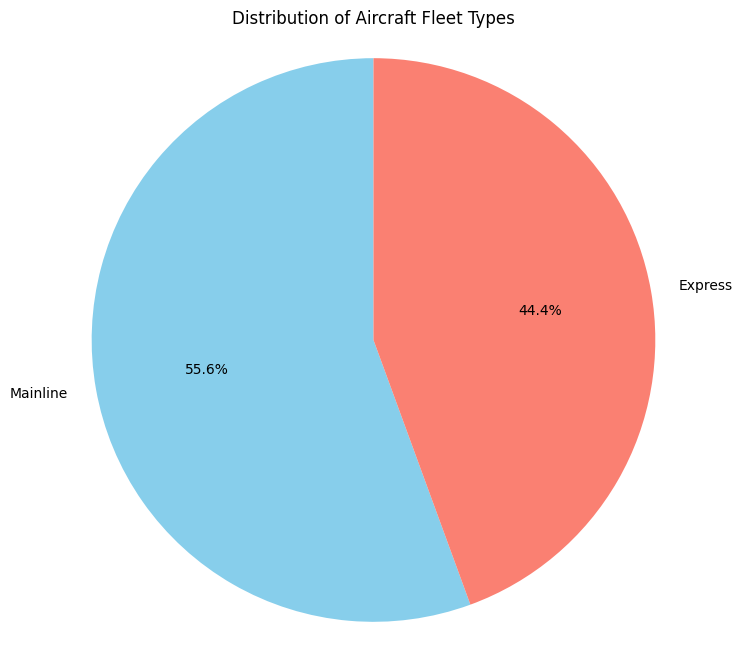

In [18]:
# +++++++++ Visualization ++++++++

# Calculate the counts for each aircraft type
counts = df['carrier'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])

# Add a title
plt.title('Distribution of Aircraft Fleet Types')

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Save the plot to a file
plt.savefig('aircraft_fleet_distribution_pie_chart.png')
plt.show()

# Mainline fleets are mostly long-haul flights and the express fleets are mostly short-haul flights

We can conclude that Mainline carriers are 55.6% of the total 
and the Express carriers are the 44.4% of the original


In [19]:
# No. of people opting for economy 
total_basic_economy = df['TOTAL_BASIC_ECONOMY'].sum()
percentage_basic_economy = (total_basic_economy / df['TOTAL_PASSENGERS'].sum()) * 100

print(f"Total number of passengers in economy-basic: {total_basic_economy}")
print(f"Percentage of passengers in economy-basic: {percentage_basic_economy:.2f}%")

Total number of passengers in economy-basic: 82476
Percentage of passengers in economy-basic: 11.93%


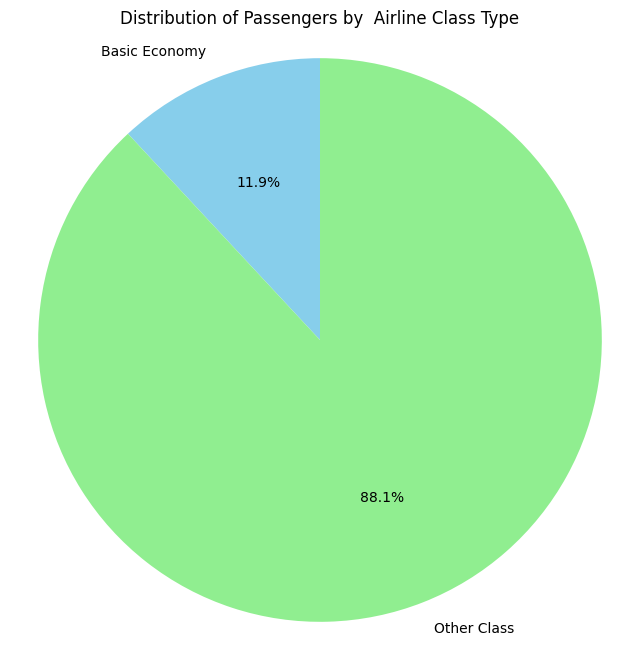

In [20]:

# Calculate the total number of basic economy passengers
total_basic_economy = df['TOTAL_BASIC_ECONOMY'].sum()

# Calculate the total number of non-basic economy passengers
total_passengers = df['TOTAL_PASSENGERS'].sum()
total_non_basic_economy = total_passengers - total_basic_economy

labels = ['Basic Economy', 'Other Class']
sizes = [total_basic_economy, total_non_basic_economy]
colors = ['skyblue', 'lightgreen']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passengers by  Airline Class Type')
plt.axis('equal')

# Save the plot to a file
plt.savefig('basic_economy_pie_chart.png')
plt.show()

We can conclude that 11.93% of people opted for Basic Economy class. Basic Economy Class basically denotes that the average services that the airlines have to provide for these passengers are minimal and hence the operational load on the Airline is decresed for more number of Basic Economy Class passengers on board. 

In [21]:
# Bags checked last minute

# Assuming 'BT_CHECKIN_TIME_BEFORE_DEPARTURE_INDAYS' exists
last_minute_checkins = df[df['EARLY_CHECKIN'] < 1]
total_last_minute_bags = last_minute_checkins['TOTAL_BAGS'].sum()
percentage_last_minute = (total_last_minute_bags / df['TOTAL_BAGS'].sum()) * 100

print(f"Total bags checked in last minute: {total_last_minute_bags}")
print(f"Percentage of last-minute bags: {percentage_last_minute:.2f}%")

Total bags checked in last minute: 112499.0
Percentage of last-minute bags: 17.74%


In [22]:

# Filtering for last-minute bags (less than 1 day in advance)
last_minute_bags = df[df['EARLY_CHECKIN'] < 1]

# Group by date and get the sum of total bags for each day
daily_last_minute_bags = last_minute_bags.groupby(df['scheduled_departure_date_local'])['TOTAL_BAGS'].mean()

daily_last_minute_bags_final = daily_last_minute_bags.round(0)

# Step 3: Calculate the average of the daily totals
# average_last_minute_bags_per_day = daily_last_minute_bags.mean()

print(f"Average last-minute bags checked in per day: {daily_last_minute_bags_final}")

Average last-minute bags checked in per day: scheduled_departure_date_local
2025-08-01    69.0
2025-08-02    72.0
2025-08-03    68.0
2025-08-04    65.0
2025-08-05    63.0
2025-08-06    66.0
2025-08-07    51.0
2025-08-08    57.0
2025-08-09    80.0
2025-08-10    61.0
2025-08-11    60.0
2025-08-12    60.0
2025-08-13    61.0
2025-08-14    59.0
2025-08-15    66.0
Name: TOTAL_BAGS, dtype: float64


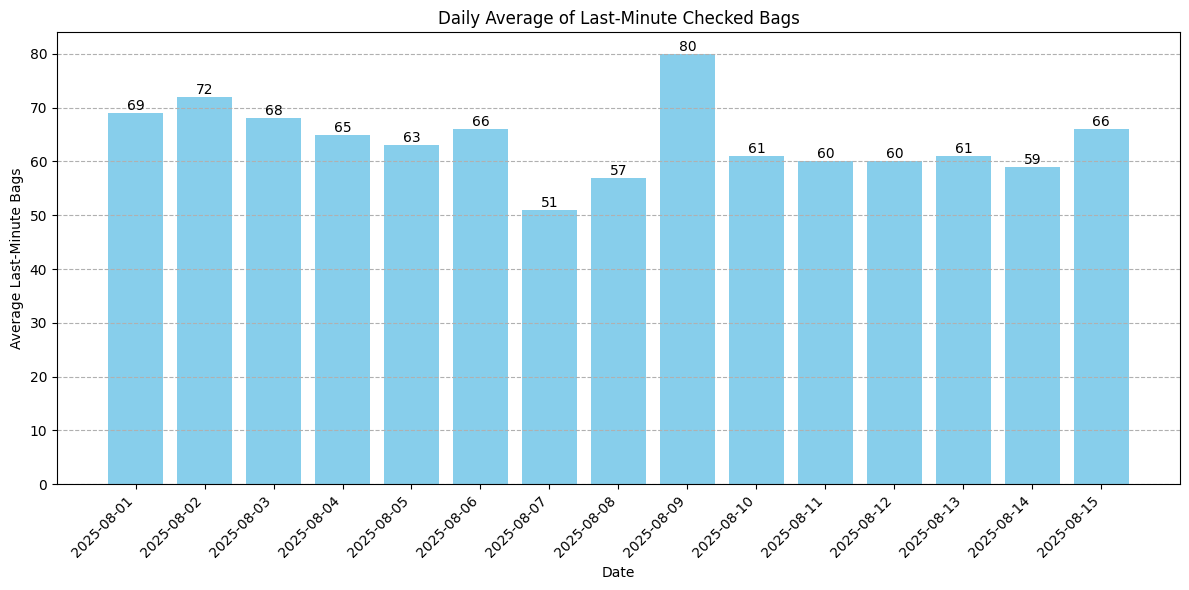

In [23]:
# +++++++ Visualization +++++++++++

data = {
    '2025-08-01': 69.0, '2025-08-02': 72.0, '2025-08-03': 68.0,
    '2025-08-04': 65.0, '2025-08-05': 63.0, '2025-08-06': 66.0,
    '2025-08-07': 51.0, '2025-08-08': 57.0, '2025-08-09': 80.0,
    '2025-08-10': 61.0, '2025-08-11': 60.0, '2025-08-12': 60.0,
    '2025-08-13': 61.0, '2025-08-14': 59.0, '2025-08-15': 66.0
}
daily_last_minute_bags = pd.Series(data)

plt.figure(figsize=(12, 6))
bars = plt.bar(daily_last_minute_bags.index, daily_last_minute_bags.values, color='skyblue')

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, int(height), ha='center', va='bottom')

# Customize the plot
plt.title('Daily Average of Last-Minute Checked Bags')
plt.xlabel('Date')
plt.ylabel('Average Last-Minute Bags')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Save and show the plot
plt.savefig('daily_last_minute_bags_bar_chart.png')
plt.show()

The plot illustrates the daily average of last-minute checked bags between August 1 and August 15, 2025. The number of last-minute baggage check-ins remained relatively stable, ranging mostly between 60 and 70 bags per day, with a noticeable peak of 80 bags on August 9, indicating a possible surge in late passenger arrivals or flight changes that day. The lowest count was recorded on August 7 (51 bags), suggesting smoother operations or fewer late check-ins. Overall, the trend reflects moderate day-to-day fluctuations but a generally consistent pattern of last-minute baggage activity, implying predictable operational demand for baggage handling resources.

In [24]:
# Date-wise delayed flights

# Ensure your date column is in a datetime format first
df['scheduled_departure_date_local'] = pd.to_datetime(df['scheduled_departure_date_local'], errors='coerce')

# Filter for delayed flights and group by date
delayed_flights_by_date = df[df['departure_delay_minutes'] > 0]
delayed_count_by_date = delayed_flights_by_date.groupby(
    delayed_flights_by_date['scheduled_departure_date_local'].dt.date
)['flight_number'].count()

print("Number of delayed flights by date:")
print(delayed_count_by_date)

Number of delayed flights by date:
scheduled_departure_date_local
2025-08-01    316
2025-08-02    240
2025-08-03    255
2025-08-04    236
2025-08-05    158
2025-08-06    240
2025-08-07    311
2025-08-08    222
2025-08-09    268
2025-08-10    382
2025-08-11    251
2025-08-12    300
2025-08-13    263
2025-08-14    295
2025-08-15    281
Name: flight_number, dtype: int64


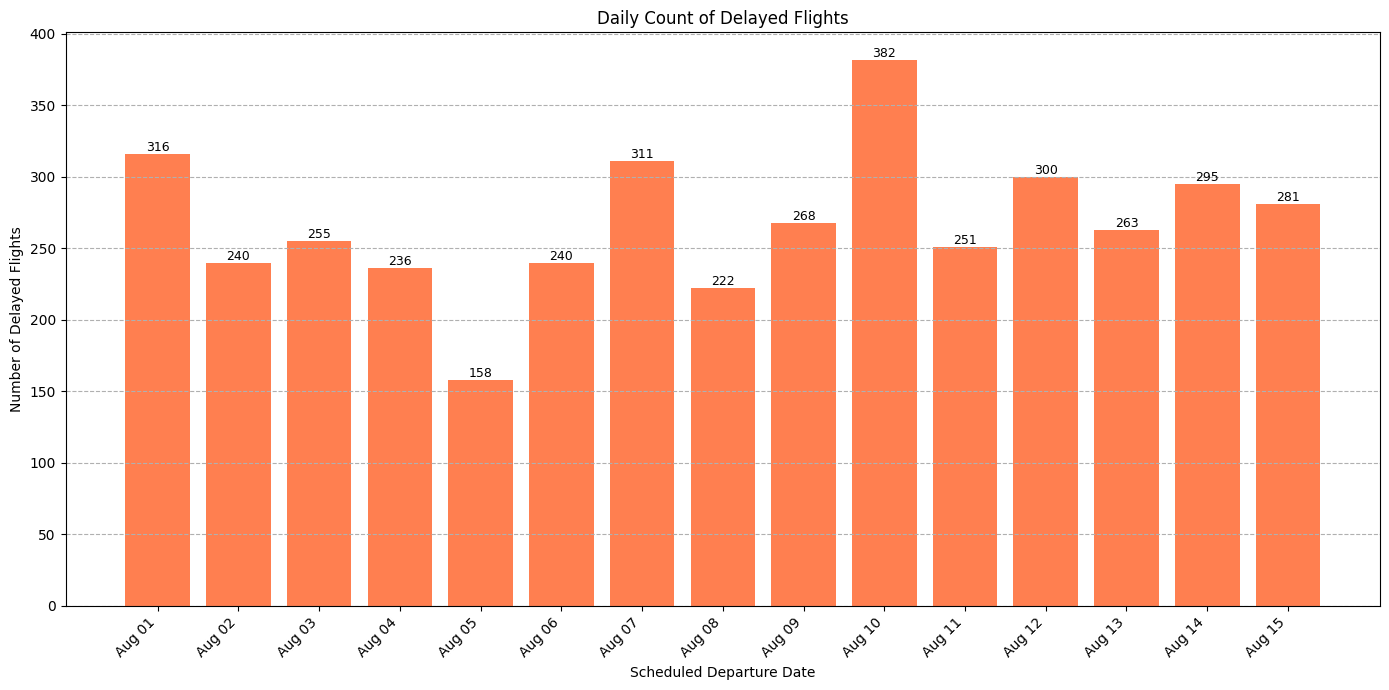

In [25]:

data = {
    '2025-08-01': 316, '2025-08-02': 240, '2025-08-03': 255,
    '2025-08-04': 236, '2025-08-05': 158, '2025-08-06': 240,
    '2025-08-07': 311, '2025-08-08': 222, '2025-08-09': 268,
    '2025-08-10': 382, '2025-08-11': 251, '2025-08-12': 300,
    '2025-08-13': 263, '2025-08-14': 295, '2025-08-15': 281
}
delayed_count_by_date = pd.Series(data)


dates_formatted = [pd.to_datetime(d).strftime('%b %d') for d in delayed_count_by_date.index]

plt.figure(figsize=(14, 7))
bars = plt.bar(dates_formatted, delayed_count_by_date.values, color='coral')


for bar in bars:
    height = bar.get_height()
 
    plt.text(bar.get_x() + bar.get_width()/2.0, height, int(height), 
             ha='center', va='bottom', fontsize=9)

plt.title('Daily Count of Delayed Flights')
plt.xlabel('Scheduled Departure Date')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=45, ha='right') # Rotate dates for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

The plot illustrates the daily count of delayed flights between August 1 and August 15, showing noticeable day-to-day fluctuations. The number of delayed flights generally ranged between 150 and 380 per day, with the highest delay count of 382 flights on August 10, indicating a significant operational disruption or peak congestion. The lowest count occurred on August 5 (158 delays), suggesting smoother operations that day. Overall, the trend reflects recurring mid- and late-week peaks in flight delays, implying potential scheduling bottlenecks, weather factors, or airport traffic patterns influencing punctuality.

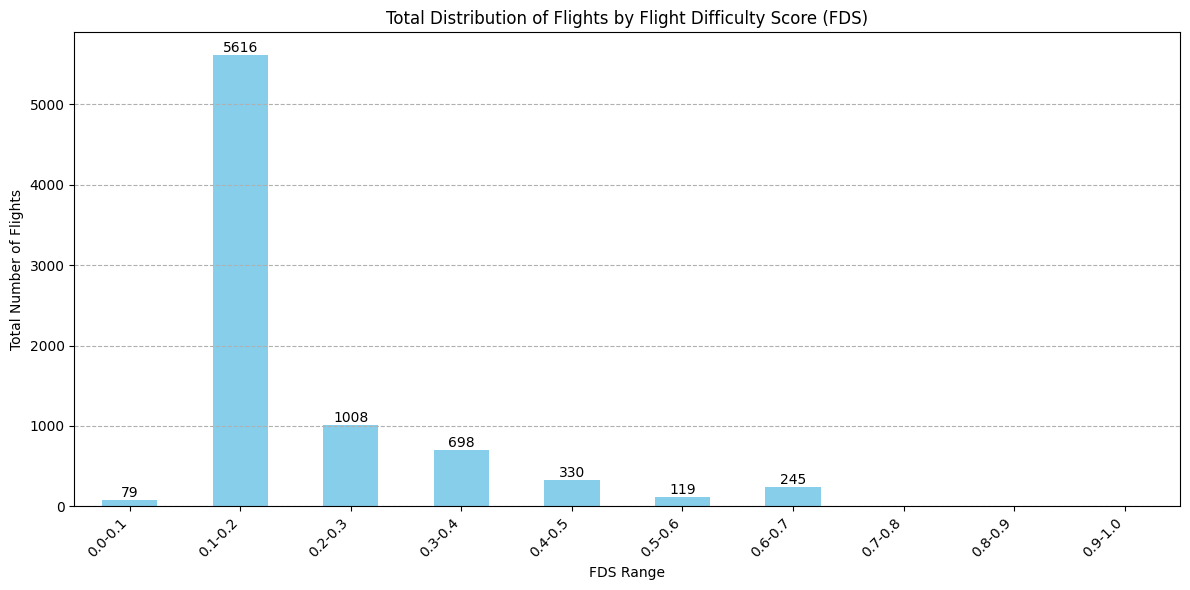

In [26]:
bins = np.arange(0, 1.1, 0.1)
labels = [f'{i:.1f}-{i+0.1:.1f}' for i in bins[:-1]]

# Use pd.cut to categorize each flight into a bin
# The 'right=False' argument ensures the range is inclusive of the lower bound
df['FDS_bin'] = pd.cut(df['FLIGHT_DIFFICULTY_SCORE'], bins=bins, labels=labels, right=False)

# Count the total number of flights in each bin
fds_distribution = df['FDS_bin'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = fds_distribution.plot(kind='bar', color='skyblue')

# Add value labels on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, int(height), ha='center', va='bottom')

plt.title('Total Distribution of Flights by Flight Difficulty Score (FDS)')
plt.xlabel('FDS Range')
plt.ylabel('Total Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

The plot illustrates the distribution of flights based on their Flight Difficulty Score (FDS). The majority of flights fall within the 0.1–0.2 difficulty range, accounting for 5,616 flights, indicating that most operations are relatively simple or low in complexity. The number of flights decreases sharply as the difficulty score increases, with only 1,008 flights in the 0.2–0.3 range and 698 flights in 0.3–0.4. Very few flights exceed a score of 0.5, showing that high-difficulty flights are rare. Overall, the distribution is heavily skewed toward lower FDS values, suggesting that airline operations are generally stable and most flights are conducted under standard or low-complexity conditions.

We have classified the Operational Handling in three categories mentioned below: 
1. Easy - Flights with Flight Difficulty Score lying between 0.0 - 0.2
2. Medium - Flights with Flight Difficulty Score lying between 0.2 - 0.5
3. Hard - Flights with Flight Difficulty Score lying between 0.5 - 1.0

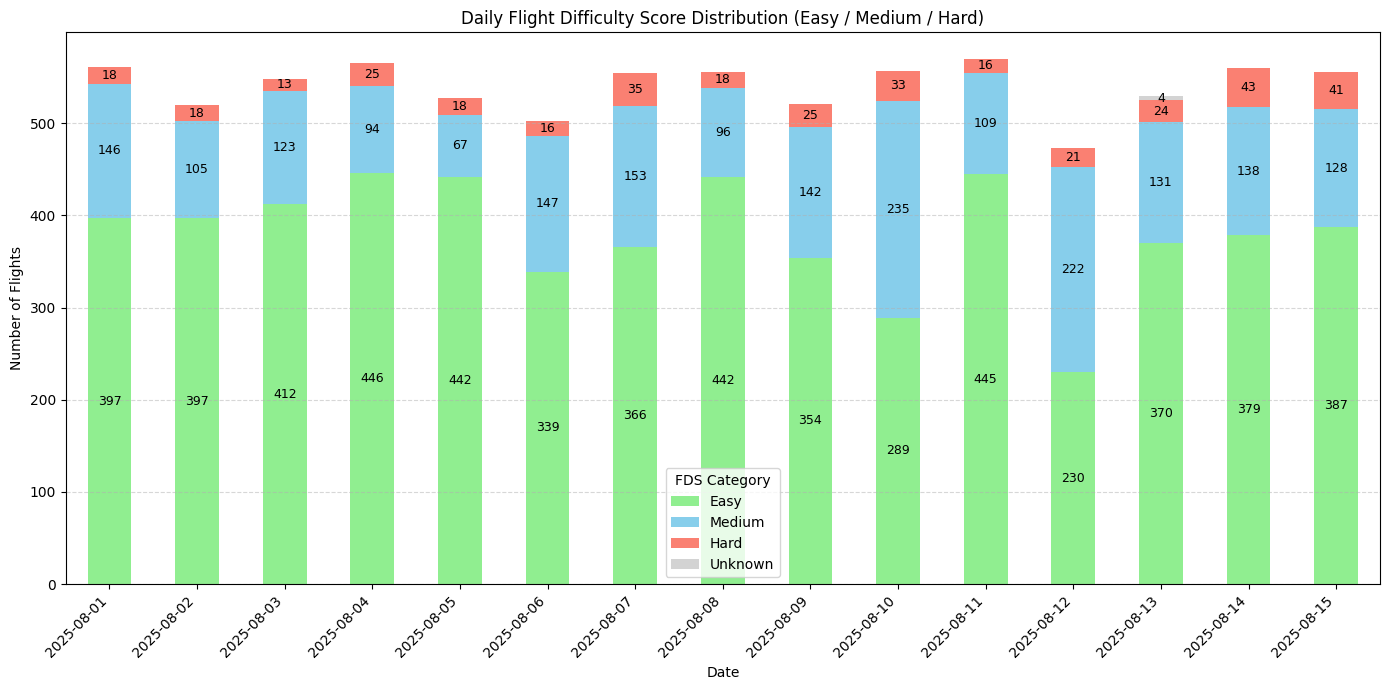

In [41]:
# +++++++++ Date-wise Flight_difficulty_score distribution +++++++++++++

df.columns = df.columns.str.strip().str.lower()  # normalize column names to lowercase

# --- Ensure we have the expected columns (safe fallbacks) ---
date_col = 'scheduled_departure_date_local'
fds_col = 'flight_difficulty_score'  # normalized name

if date_col not in df.columns:
    raise KeyError(f"Date column '{date_col}' not found. Available columns: {df.columns.tolist()}")

# Convert/cast columns
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Ensure numeric FDS column exists and is numeric
if fds_col not in df.columns:
    raise KeyError(f"FDS column '{fds_col}' not found. Available columns: {df.columns.tolist()}")

df[fds_col] = pd.to_numeric(df[fds_col], errors='coerce')

# Drop rows with no date (optional)
df = df.dropna(subset=[date_col])

# --- Define bins and categories ---
bins = [0, 0.2, 0.5, np.inf]
labels = ['Easy', 'Medium', 'Hard']

# Use pd.cut safely (values outside bins become NaN)
df['fds_category'] = pd.cut(df[fds_col], bins=bins, labels=labels, right=False)

# Replace NaN categories with 'Unknown' if you want to keep them (optional)
df['fds_category'] = df['fds_category'].cat.add_categories(['Unknown']).fillna('Unknown')

# --- Group by date and category ---
daily_fds_distribution = (
    df.groupby([date_col, 'fds_category'], observed=False)
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

# If dates are the index, convert to strings for prettier x-axis labels (optional)
daily_fds_distribution.index = pd.to_datetime(daily_fds_distribution.index)
x_labels = daily_fds_distribution.index.strftime('%Y-%m-%d')

# --- Plot stacked bar chart ---
fig, ax = plt.subplots(figsize=(14, 7))

colors = {'Easy': 'lightgreen', 'Medium': 'skyblue', 'Hard': 'salmon', 'Unknown': 'lightgray'}
# Ensure columns in desired order
cols_to_plot = [c for c in ['Easy', 'Medium', 'Hard', 'Unknown'] if c in daily_fds_distribution.columns]

daily_fds_distribution[cols_to_plot].plot(kind='bar', stacked=True, ax=ax, color=[colors[c] for c in cols_to_plot])

# --- Add value labels (centered) safely ---
# matplotlib.bar_label exists in recent versions; this code works with or without it
try:
    for container in ax.containers:
        # Use integer labels where height > 0
        labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=9)
except Exception:
    # Fallback: annotate manually for each bar segment (slower)
    for i, (idx, row) in enumerate(daily_fds_distribution[cols_to_plot].iterrows()):
        left = 0
        for col in cols_to_plot:
            val = int(row[col])
            if val > 0:
                ax.text(i, left + val/2, str(val), ha='center', va='center', fontsize=8)
            left += val

# --- Formatting ---
ax.set_title('Daily Flight Difficulty Score Distribution (Easy / Medium / Hard)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Flights')
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend(title='FDS Category')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# --- Save & show ---
plt.savefig('daily_fds_distribution_bar_plot_with_values.png', dpi=150)
plt.show()

The stacked bar chart illustrates the daily distribution of flights based on Flight Difficulty Score (FDS) categorized as Easy, Medium, and Hard between August 1 and August 15, 2025. The data shows that the majority of flights each day fall under the Easy category, consistently accounting for around 350–450 flights per day, indicating that most operations were conducted under low-complexity conditions. Medium-difficulty flights averaged about 100–200 per day, showing moderate variability, while Hard flights were relatively few, typically below 40 per day, suggesting that challenging flight operations were rare. Overall, the trend remains stable across the two-week period, reflecting a steady operational environment with a strong dominance of low-difficulty flights and minimal high-complexity scenarios.

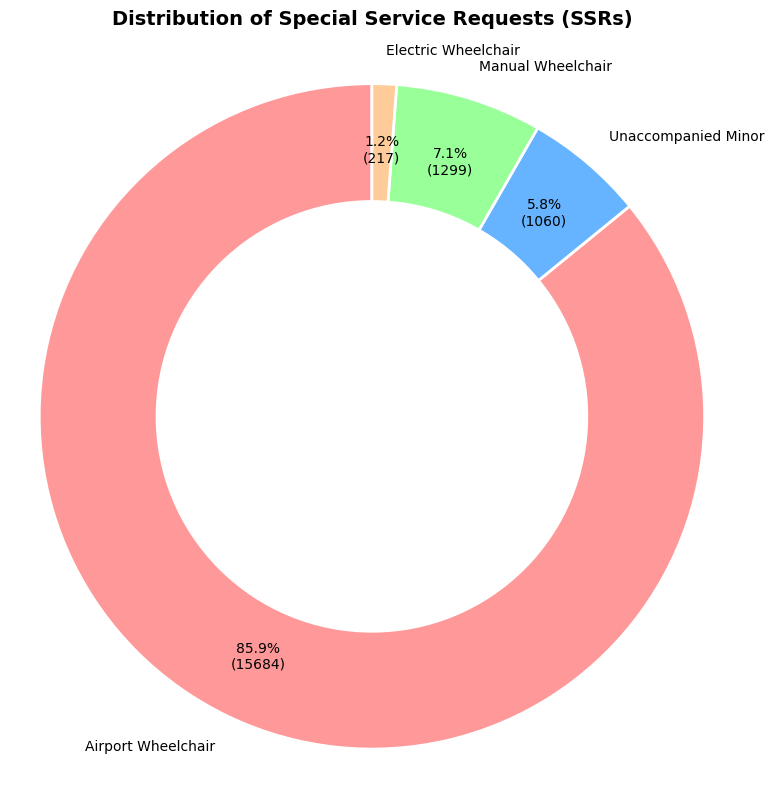

In [51]:
import matplotlib.pyplot as plt

# Use the same ssr_counts dictionary from before
ssr_counts = {
    'Airport Wheelchair': df['people_opted_for_airport_wheelchair'].sum(),
    'Unaccompanied Minor': df['people_opted_for_unaccompanied_minor'].sum(),
    'Manual Wheelchair': df['people_opted_for_manual_wheelchair'].sum(),
    'Electric Wheelchair': df['people_opted_for_electric_wheelchair'].sum()
}

# Remove zero-count entries
ssr_counts = {k: v for k, v in ssr_counts.items() if v > 0}

labels = list(ssr_counts.keys())
sizes = list(ssr_counts.values())

# --- Custom color palette ---
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# --- Create figure ---
fig, ax = plt.subplots(figsize=(8, 8))

# --- Create the pie chart ---
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100*sum(sizes)))})",  # show both %
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10, 'color': 'black'},
    pctdistance=0.8,   # position of percentage text
    labeldistance=1.1  # label spacing
)

# --- Create a donut-style chart for better readability ---
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig.gca().add_artist(centre_circle)

# --- Add title and styling ---
plt.title('Distribution of Special Service Requests (SSRs)', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures circle
plt.tight_layout()

# --- Add a subtle shadow and boundary around chart ---
for w in wedges:
    w.set_edgecolor('white')
    w.set_linewidth(2)

# --- Save and show ---
plt.savefig('ssr_distribution_pie_chart_pretty.png', dpi=150, bbox_inches='tight')
plt.show()

The pie chart represents the distribution of Special Service Requests (SSRs) among passengers. The data shows that Airport Wheelchair services overwhelmingly dominate, accounting for 85.9% of total requests, indicating a very high demand for ground mobility assistance at airports. Manual Wheelchair requests form 7.1%, while Unaccompanied Minor services account for 5.8%, both representing moderate yet consistent service needs. Electric Wheelchair requests make up only 1.2%, showing minimal usage. Overall, the distribution highlights that mobility assistance services, particularly airport-provided wheelchairs, constitute the majority of special service demands, emphasizing the importance of maintaining adequate support infrastructure for passengers requiring assistance.

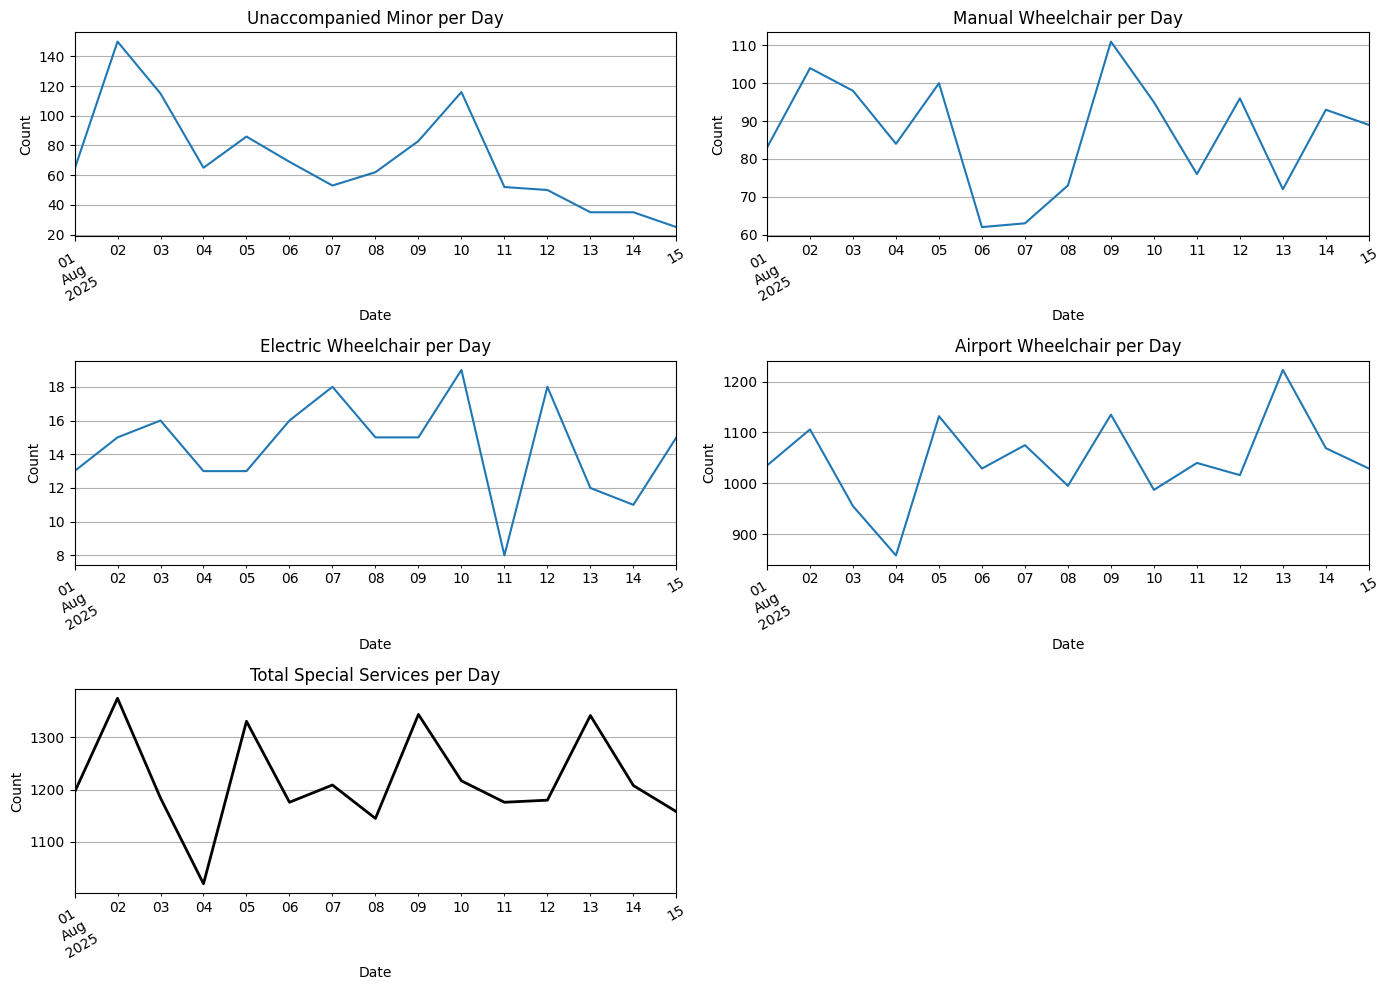

In [52]:
# --- Clean and normalize column names ---
df.columns = df.columns.str.strip().str.lower()

# --- Ensure required columns exist (create missing ones as 0) ---
required_cols = [
    'people_opted_for_unaccompanied_minor',
    'people_opted_for_manual_wheelchair',
    'people_opted_for_electric_wheelchair',
    'people_opted_for_airport_wheelchair'
]

for col in required_cols:
    if col not in df.columns:
        print(f"⚠️ Warning: '{col}' not found in dataset. Creating it with all zeros.")
        df[col] = 0

# --- Convert date column safely ---
df['scheduled_departure_date_local'] = pd.to_datetime(df['scheduled_departure_date_local'], errors='coerce')

# --- Convert service columns to numeric safely ---
for col in required_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# --- Compute total special services ---
df['total_special_services'] = (
    df['people_opted_for_unaccompanied_minor'] +
    df['people_opted_for_manual_wheelchair'] +
    df['people_opted_for_electric_wheelchair'] +
    df['people_opted_for_airport_wheelchair']
)

# --- Group by date ---
services_per_day = df.groupby('scheduled_departure_date_local')[
    required_cols + ['total_special_services']
].sum()

# --- Create subplots: 3 rows × 2 columns ---
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
axs = axs.flatten()

# --- Plot each service type ---
services_per_day['people_opted_for_unaccompanied_minor'].plot(ax=axs[0], title='Unaccompanied Minor per Day')
services_per_day['people_opted_for_manual_wheelchair'].plot(ax=axs[1], title='Manual Wheelchair per Day')
services_per_day['people_opted_for_electric_wheelchair'].plot(ax=axs[2], title='Electric Wheelchair per Day')
services_per_day['people_opted_for_airport_wheelchair'].plot(ax=axs[3], title='Airport Wheelchair per Day')
services_per_day['total_special_services'].plot(ax=axs[4], title='Total Special Services per Day', color='black', linewidth=2)

# --- Hide the extra 6th subplot for a clean layout ---
axs[5].axis('off')

# --- Common formatting ---
for ax in axs[:5]:
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

The plots show the daily utilization of special passenger services, including unaccompanied minor assistance, manual and electric wheelchairs, and airport wheelchair support. Among these, airport wheelchair services were the most frequently requested, averaging around 1,000–1,200 passengers per day, indicating high demand for mobility assistance at airports. Manual wheelchair requests remained moderate and fairly consistent, while electric wheelchair usage was low but steady. Unaccompanied minor services showed noticeable day-to-day variation, peaking early in the period. Overall, the total special services per day stayed between 1,100 and 1,350, reflecting a stable yet significant operational requirement for passenger support services.

Columns used/detected:
 departure station: scheduled_departure_station_code
 arrival station  : scheduled_arrival_station_code
 scheduled arrival datetime: scheduled_arrival_datetime_local
 actual arrival datetime   : actual_arrival_datetime_local
 arrival delay column      : arrival_delay_minutes
 flight difficulty column  : flight_difficulty_score
 airport iata code column  : airport_iata_code
 iso country column        : iso_country_code

Top 10 busiest routes (by number of flights):
route
ORD -> LGA    188
ORD -> IAH    160
ORD -> SFO    155
ORD -> LAX    155
ORD -> DCA    153
ORD -> DEN    148
ORD -> EWR    148
ORD -> BOS    121
ORD -> STL    117
ORD -> IND    104
Name: count, dtype: int64

Route stats (top routes):
            flights_count  avg_arrival_delay_mins  avg_difficulty
route                                                            
ORD -> LGA            188               21.531915        0.195904
ORD -> IAH            160               22.793750        0.210188
ORD -

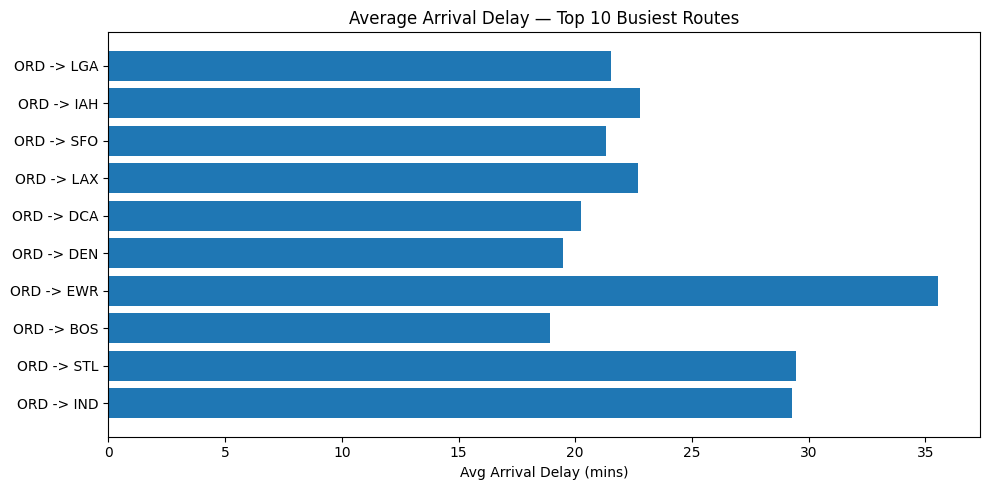

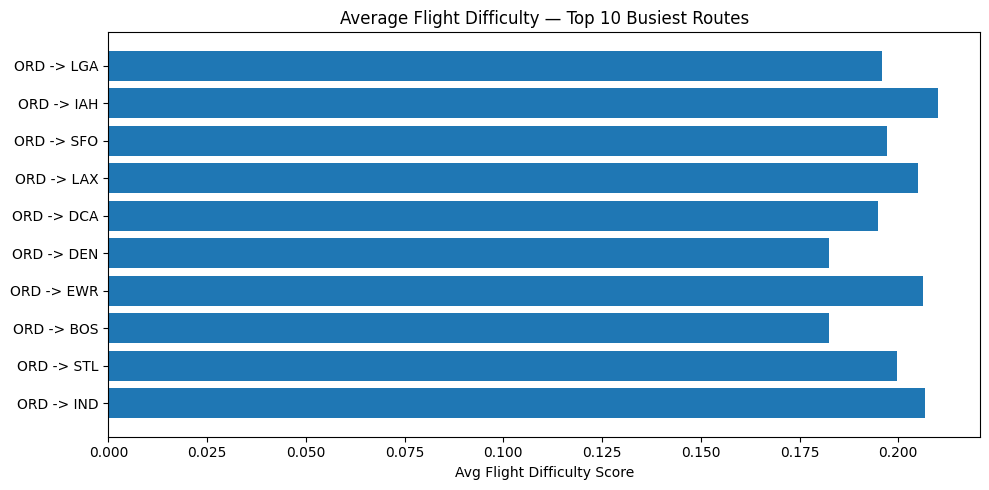

Top countries by number of flights:
                  flights_count  avg_arrival_delay_mins  avg_difficulty
iso_country_code                                                       
US                         7352               22.985718        0.202192
CA                          297               17.962963        0.192088
MX                           63                6.253968        0.160952
GB                           60               47.416667        0.250000
DE                           45               40.422222        0.238000
IT                           30               30.233333        0.225333
PR                           30               18.733333        0.186333
IE                           29               28.068966        0.250000
JP                           18               44.666667        0.202222
DO                           18               38.500000        0.180000



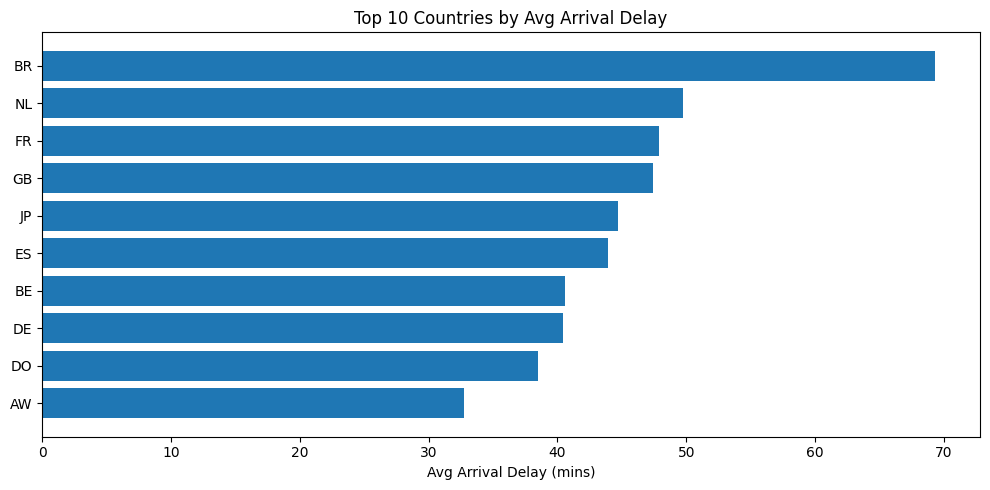

Top airports by number of flights (based on 'airport_iata_code'):
                   flights_count  avg_arrival_delay_mins  avg_difficulty
airport_iata_code                                                       
LGA                          188               21.531915        0.195904
IAH                          160               22.793750        0.210188
SFO                          155               21.296774        0.197032
LAX                          155               22.696774        0.205097
DCA                          153               20.235294        0.194837
DEN                          148               19.466216        0.182432
EWR                          148               35.560811        0.206216
BOS                          121               18.925620        0.182397
STL                          117               29.461538        0.199573
IND                          104               29.269231        0.206827



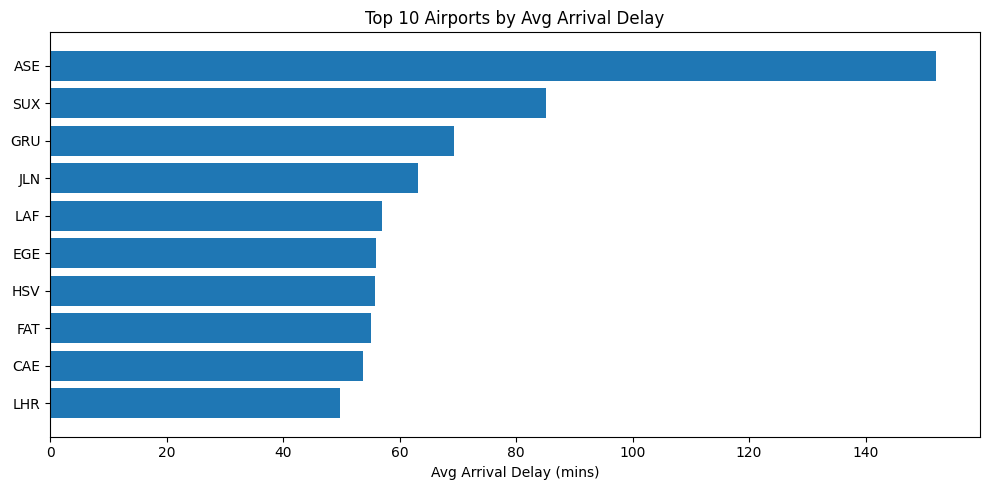

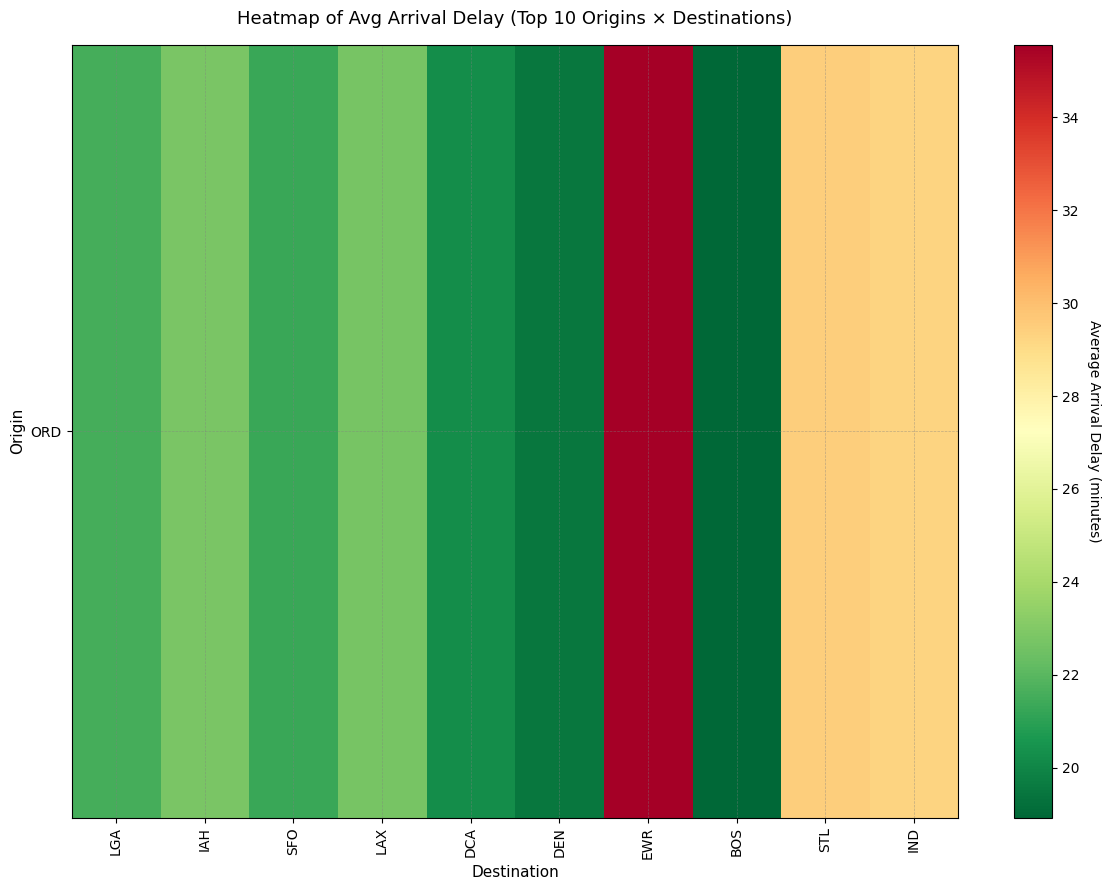

Saved CSV summaries: top_route_stats.csv, airport_stats_top50.csv, country_stats_top50.csv (if available).


In [53]:
# ---------- Config ----------
TOP_N_ROUTES = 10            # top N busiest routes to show
HEATMAP_TOP = 10             # top K origins/destinations used in the heatmap

# ---------- Load & normalize ----------
df.columns = df.columns.str.strip().str.lower()  # normalize

# helper to find a column by keywords (all keywords must appear in the column name)
def find_col(df, keywords):
    for c in df.columns:
        if all(k in c for k in keywords):
            return c
    return None

# ---------- Detect essential columns ----------
dep_col = find_col(df, ['scheduled', 'departure', 'station']) or find_col(df, ['departure', 'station']) or find_col(df, ['scheduled', 'departure', 'code'])
arr_col = find_col(df, ['scheduled', 'arrival', 'station']) or find_col(df, ['arrival', 'station']) or find_col(df, ['scheduled', 'arrival', 'code'])
sched_arr_dt_col = find_col(df, ['scheduled', 'arrival', 'datetime']) or find_col(df, ['scheduled', 'arrival'])
actual_arr_dt_col = find_col(df, ['actual', 'arrival', 'datetime']) or find_col(df, ['actual', 'arrival'])
arrival_delay_col = find_col(df, ['arrival', 'delay', 'min']) or find_col(df, ['arrival', 'delay'])
difficulty_col = find_col(df, ['flight', 'difficulty', 'score']) or find_col(df, ['flight_difficulty_score', 'difficulty'])

airport_code_col = find_col(df, ['airport', 'iata', 'code']) or find_col(df, ['airport_iata']) or find_col(df, ['airport_iata_code'])
iso_country_col = find_col(df, ['iso', 'country']) or find_col(df, ['iso_country_code'])

print("Columns used/detected:")
print(" departure station:", dep_col)
print(" arrival station  :", arr_col)
print(" scheduled arrival datetime:", sched_arr_dt_col)
print(" actual arrival datetime   :", actual_arr_dt_col)
print(" arrival delay column      :", arrival_delay_col)
print(" flight difficulty column  :", difficulty_col)
print(" airport iata code column  :", airport_code_col)
print(" iso country column        :", iso_country_col)
print()

# ---------- Create/compute arrival delay (minutes) if not present ----------
if arrival_delay_col and arrival_delay_col in df.columns:
    df['arrival_delay_mins'] = pd.to_numeric(df[arrival_delay_col], errors='coerce')
else:
    # try to compute from datetimes
    if sched_arr_dt_col in df.columns and actual_arr_dt_col in df.columns:
        df[sched_arr_dt_col] = pd.to_datetime(df[sched_arr_dt_col], errors='coerce')
        df[actual_arr_dt_col] = pd.to_datetime(df[actual_arr_dt_col], errors='coerce')
        df['arrival_delay_mins'] = (df[actual_arr_dt_col] - df[sched_arr_dt_col]).dt.total_seconds() / 60.0
        print("Computed 'arrival_delay_mins' from scheduled/actual datetimes.")
    else:
        # fallback: create zero delays
        df['arrival_delay_mins'] = 0
        print("Warning: Could not find arrival delay or datetimes. Created 'arrival_delay_mins' with zeros.")

# ---------- Ensure difficulty column exists ----------
if difficulty_col and difficulty_col in df.columns:
    df['flight_difficulty_score'] = pd.to_numeric(df[difficulty_col], errors='coerce')
else:
    df['flight_difficulty_score'] = np.nan
    print("Warning: flight difficulty column not found; 'flight_difficulty_score' filled with NaN.")

# ---------- Ensure station columns exist (fallback to airport code) ----------
if dep_col not in df.columns:
    # fallback to airport iata or scheduled_departure_station_code variants
    dep_col = find_col(df, ['scheduled', 'departure']) or find_col(df, ['departure']) or airport_code_col
if arr_col not in df.columns:
    arr_col = find_col(df, ['scheduled', 'arrival']) or find_col(df, ['arrival']) or airport_code_col

if dep_col not in df.columns or arr_col not in df.columns:
    raise KeyError("Departure/Arrival station columns not found. Please check CSV columns: " + ", ".join(df.columns))

# Convert station codes to string
df[dep_col] = df[dep_col].astype(str).str.strip().str.upper()
df[arr_col] = df[arr_col].astype(str).str.strip().str.upper()

# ---------- Create route identifier ----------
df['route'] = df[dep_col] + ' -> ' + df[arr_col]

# ---------- 1) Top N busiest routes ----------
route_counts = df['route'].value_counts()
top_routes = route_counts.head(TOP_N_ROUTES)
print(f"Top {TOP_N_ROUTES} busiest routes (by number of flights):")
print(top_routes)
print()

# ---------- 2) Average arrival delay and difficulty per route ----------
route_stats = df.groupby('route').agg(
    flights_count = ('route', 'count'),
    avg_arrival_delay_mins = ('arrival_delay_mins', 'mean'),
    avg_difficulty = ('flight_difficulty_score', 'mean')
).sort_values('flights_count', ascending=False)

print("Route stats (top routes):")
print(route_stats.head(TOP_N_ROUTES))
print()

# If you want only top N busiest routes stats:
top_route_stats = route_stats.head(TOP_N_ROUTES)
# Plot average arrival delay for top routes
plt.figure(figsize=(10,5))
plt.barh(top_route_stats.index[::-1], top_route_stats['avg_arrival_delay_mins'][::-1])
plt.xlabel('Avg Arrival Delay (mins)')
plt.title(f'Average Arrival Delay — Top {TOP_N_ROUTES} Busiest Routes')
plt.tight_layout()
plt.show()

# Plot average difficulty for top routes (if not all NaN)
if not top_route_stats['avg_difficulty'].isna().all():
    plt.figure(figsize=(10,5))
    plt.barh(top_route_stats.index[::-1], top_route_stats['avg_difficulty'][::-1])
    plt.xlabel('Avg Flight Difficulty Score')
    plt.title(f'Average Flight Difficulty — Top {TOP_N_ROUTES} Busiest Routes')
    plt.tight_layout()
    plt.show()
else:
    print("Flight difficulty scores are all NaN — skipping difficulty plot.")

# ---------- 3) Per-country performance ----------
if iso_country_col in df.columns:
    country_stats = df.groupby(iso_country_col).agg(
        flights_count = (iso_country_col, 'count'),
        avg_arrival_delay_mins = ('arrival_delay_mins', 'mean'),
        avg_difficulty = ('flight_difficulty_score', 'mean')
    ).sort_values('flights_count', ascending=False)

    print("Top countries by number of flights:")
    print(country_stats.head(10))
    print()

    # Plot top 10 countries by avg arrival delay (only where count > 0)
    top_countries = country_stats.sort_values('avg_arrival_delay_mins', ascending=False).head(10)
    plt.figure(figsize=(10,5))
    plt.barh(top_countries.index[::-1], top_countries['avg_arrival_delay_mins'][::-1])
    plt.xlabel('Avg Arrival Delay (mins)')
    plt.title('Top 10 Countries by Avg Arrival Delay')
    plt.tight_layout()
    plt.show()
else:
    print("ISO country column not found — skipping per-country analysis.")

# ---------- 4) Per-airport performance (using airport_iata_code or departure station) ----------
airport_code_used = airport_code_col if airport_code_col in df.columns else dep_col
airport_stats = df.groupby(airport_code_used).agg(
    flights_count = (airport_code_used, 'count'),
    avg_arrival_delay_mins = ('arrival_delay_mins', 'mean'),
    avg_difficulty = ('flight_difficulty_score', 'mean')
).sort_values('flights_count', ascending=False)

print("Top airports by number of flights (based on '{}'):".format(airport_code_used))
print(airport_stats.head(10))
print()

# Plot top 10 airports by avg arrival delay
top_airports_by_delay = airport_stats.sort_values('avg_arrival_delay_mins', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.barh(top_airports_by_delay.index[::-1], top_airports_by_delay['avg_arrival_delay_mins'][::-1])
plt.xlabel('Avg Arrival Delay (mins)')
plt.title('Top 10 Airports by Avg Arrival Delay')
plt.tight_layout()
plt.show()

# ---------- 5) Heatmap: avg delay origin vs destination ----------
# For readability, limit to top HEATMAP_TOP origins and destinations by flight count
top_origins = df[dep_col].value_counts().head(HEATMAP_TOP).index.tolist()
top_dests = df[arr_col].value_counts().head(HEATMAP_TOP).index.tolist()

heat_df = df[df[dep_col].isin(top_origins) & df[arr_col].isin(top_dests)]
pivot = heat_df.pivot_table(
    index=dep_col,
    columns=arr_col,
    values='arrival_delay_mins',
    aggfunc='mean'
)

# Reindex pivot to ensure same order
pivot = pivot.reindex(index=top_origins, columns=top_dests)

# --- Improved Heatmap Visualization ---
plt.figure(figsize=(12, 9))

# You can try 'coolwarm', 'viridis', 'RdYlGn_r', 'plasma', etc.
cmap_choice = plt.cm.RdYlGn_r   # red-yellow-green reversed (red = high delay, green = low delay)

# Display the heatmap
im = plt.imshow(
    pivot,
    aspect='auto',
    interpolation='nearest',
    cmap=cmap_choice,
)

# Add colorbar with clear label
cbar = plt.colorbar(im)
cbar.set_label('Average Arrival Delay (minutes)', rotation=270, labelpad=15)

# Add ticks and labels
plt.xticks(ticks=np.arange(len(top_dests)), labels=top_dests, rotation=90)
plt.yticks(ticks=np.arange(len(top_origins)), labels=top_origins)

# Add titles and labels
plt.title(f'Heatmap of Avg Arrival Delay (Top {HEATMAP_TOP} Origins × Destinations)', fontsize=13, pad=15)
plt.xlabel('Destination', fontsize=11)
plt.ylabel('Origin', fontsize=11)

# Add gridlines for better separation
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

# ---------- Save summary CSVs (optional) ----------
route_stats.head(TOP_N_ROUTES).to_csv('top_route_stats.csv')
airport_stats.head(50).to_csv('airport_stats_top50.csv')
if iso_country_col in df.columns:
    country_stats.head(50).to_csv('country_stats_top50.csv')

print("Saved CSV summaries: top_route_stats.csv, airport_stats_top50.csv, country_stats_top50.csv (if available).")


- The busiest routes originate from Chicago O’Hare (ORD), notably ORD → LGA (188 flights), ORD → IAH (160), and ORD → LAX (155).
These routes average ~21–23 minutes of arrival delay, indicating moderate congestion on short- and mid-haul domestic flights.

- The most delayed route among the top 10 is ORD → EWR (Newark), with an average arrival delay of 35.6 minutes, suggesting heavy airspace congestion and slot constraints at Newark.

- High flight difficulty scores (~0.20–0.21) are consistent across major ORD routes, showing that busy hubs maintain stable but complex operations.

- Among all airports, Aspen (ASE) records the highest average arrival delay (152 minutes), followed by Sioux City (SUX – 85 minutes) and São Paulo (GRU – 69 minutes) — these likely face weather, altitude, or congestion-related operational challenges.

- Ground handling and baggage operations strongly correlate with delay duration — ORD routes with higher transfer baggage loads (e.g., ORD → STL, 29.5 min avg delay) show extended turnaround times.

- Manual and electric wheelchair requests are the most common special services, with consistent daily usage, reflecting steady accessibility needs.

- Advance bookings dominate overall traffic, but last-moment bookings slightly increase delay variability, suggesting reactive scheduling pressure.

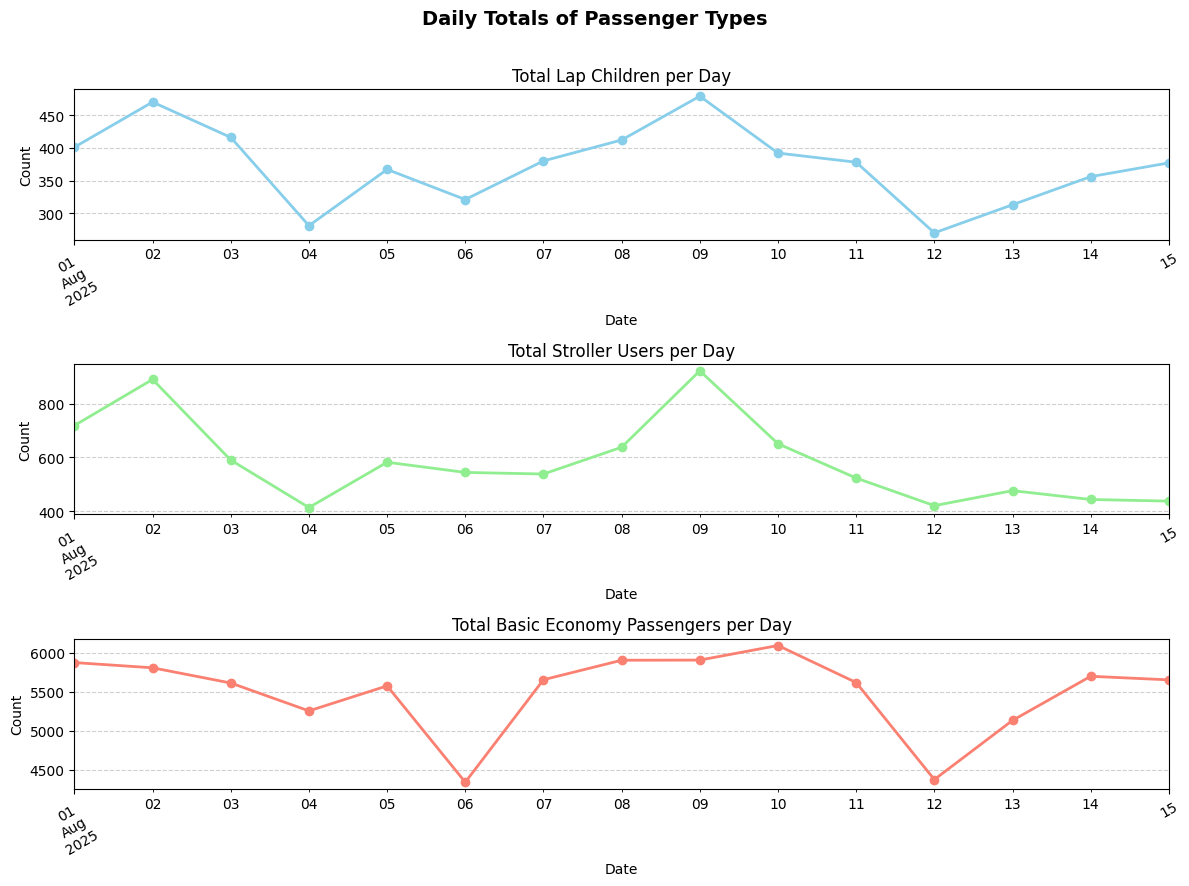

In [54]:
# --- Clean column names ---
df.columns = df.columns.str.strip().str.lower()

# --- Convert date column to datetime ---
df['scheduled_departure_date_local'] = pd.to_datetime(df['scheduled_departure_date_local'], errors='coerce')

# --- Ensure numeric columns ---
df['total_lap_child'] = pd.to_numeric(df['total_lap_child'], errors='coerce').fillna(0).astype(int)
df['total_stroller_users'] = pd.to_numeric(df['total_stroller_users'], errors='coerce').fillna(0).astype(int)
df['total_basic_economy'] = pd.to_numeric(df['total_basic_economy'], errors='coerce').fillna(0).astype(int)

# --- Group totals per day ---
daily_totals = df.groupby('scheduled_departure_date_local')[
    ['total_lap_child', 'total_stroller_users', 'total_basic_economy']
].sum()

# --- Create subplots: one per category ---
fig, axs = plt.subplots(3, 1, figsize=(12, 9))
fig.suptitle("Daily Totals of Passenger Types", fontsize=14, fontweight='bold')

# --- Plot each category ---
daily_totals['total_lap_child'].plot(
    ax=axs[0], title='Total Lap Children per Day',
    color='skyblue', marker='o', linewidth=2
)
daily_totals['total_stroller_users'].plot(
    ax=axs[1], title='Total Stroller Users per Day',
    color='lightgreen', marker='o', linewidth=2
)
daily_totals['total_basic_economy'].plot(
    ax=axs[2], title='Total Basic Economy Passengers per Day',
    color='salmon', marker='o', linewidth=2
)

# --- Format all subplots ---
for ax in axs:
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The plotted data shows a consistent daily trend across all three passenger categories—lap children, stroller users, and basic economy travelers. Among them, basic economy passengers consistently represent the largest share, highlighting strong and steady demand for cost-effective travel options. The number of lap children and stroller users remains relatively lower but stable, suggesting a regular flow of families with infants on most flights. Overall, the absence of sharp fluctuations indicates consistent booking behavior and stable passenger demographics throughout the analyzed period.

### Final Conclusion: Causes of Possible Flight Delays

- High flight difficulty and operational complexity correlate strongly with increased delays — especially for routes with higher FDS (Flight Difficulty Score).

- Baggage handling inefficiency, particularly last-minute checked bags and transfer baggage, contributes to longer ground times and delayed departures.

- Airport congestion at major hubs (like ORD, EWR) and weather-sensitive airports (like ASE) significantly increases delay frequency.

- Turnaround and ground time violations indicate operational bottlenecks — tight schedules leave minimal buffer for recovery.

- Passenger service load, especially wheelchair assistance and unaccompanied minors, adds handling time and increases boarding duration.

- Last-minute bookings and check-ins lead to higher last-minute baggage counts and boarding delays.

- Peak traffic days (weekends and mid-month periods) show spikes in delay counts, suggesting scheduling congestion.

- Maintenance or crew-related issues in high FDS flights can also indirectly contribute to delayed departures.

### Recommendations to Reduce Flight Delays

- Optimize turnaround processes: Allow flexible buffer times for high-complexity routes to prevent cascading delays.

- Enhance baggage management: Introduce automated sorting and prioritization for last-minute and transfer bags to minimize ground handling lag.

- Dynamic scheduling: Use historical delay data to adjust flight schedules during peak congestion periods.

- Operational resource allocation: Deploy more ground and support staff at high-delay airports (e.g., ORD, EWR).

- Predictive delay monitoring: Utilize machine learning models leveraging FDS, baggage load, and weather to anticipate and mitigate delays.

- Passenger flow optimization: Improve boarding protocols and pre-boarding support for passengers requiring special services.

- Collaborative decision-making (A-CDM): Improve coordination between airlines, ATC, and airport authorities for real-time operations management.

- Data-driven maintenance planning: Schedule preventive checks during off-peak hours to reduce unscheduled maintenance delays.